# 1 Google Play Store Apps and Reviews

Mobile apps are everywhere. They are easy to create and can be lucrative. Because of these two factors, more and more apps are being developed. In this notebook, we will do a comprehensive analysis of the Android app market by comparing over ten thousand apps in Google Play across different categories. We'll look for insights in the data to devise strategies to drive growth and retention.

Let's take a look at the data, which consists of two files:

1. apps.csv: contains all the details of the applications on Google Play. There are 13 features that describe a given app.

2. user_reviews.csv: contains 100 reviews for each app, most helpful first. The text in each review has been pre-processed and attributed with three new features: Sentiment (Positive, Negative or Neutral), Sentiment Polarity and Sentiment Subjectivity.

<img src = "https://assets.datacamp.com/production/project_619/img/google_play_store.png">

### 1.1 Import the Software Libraries

In [332]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### 1.2 Read the Apps Dataset

In [333]:
# Write your code here
from google.colab import drive
drive.mount('/content/drive')

%cd /content/drive/MyDrive

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/MyDrive


In [334]:
df = pd.read_csv('apps.csv')

### 1.3 Print the first five rows

In [335]:
# Write your code here
print("First 5 rows:")
df.head(5)

First 5 rows:


,Unnamed: 0,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19.0,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,1,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25.0,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


### 1.4 Drop the Unnamed: 0 Column

In [336]:
# Write your code here
# Assuming you have a DataFrame named 'df' with the "Unnamed: 0" column
df = df.drop(columns="Unnamed: 0", axis=1)

# Display the updated DataFrame (first 5 rows)
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19.0,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25.0,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


### 1.5 Print the Number of rows and columns

In [337]:
# Write your code here
rows, columns = df.shape
print("Number of rows:", rows)
print("Number of columns:", columns)

Number of rows: 9659
Number of columns: 13


### 1.6 Print the Basic Information of the dataset

In [338]:
# Write your code here
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9659 entries, 0 to 9658
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             9659 non-null   object 
 1   Category        9659 non-null   object 
 2   Rating          8196 non-null   float64
 3   Reviews         9659 non-null   int64  
 4   Size            8432 non-null   float64
 5   Installs        9659 non-null   object 
 6   Type            9659 non-null   object 
 7   Price           9659 non-null   object 
 8   Content Rating  9659 non-null   object 
 9   Genres          9659 non-null   object 
 10  Last Updated    9659 non-null   object 
 11  Current Ver     9651 non-null   object 
 12  Android Ver     9657 non-null   object 
dtypes: float64(2), int64(1), object(10)
memory usage: 981.1+ KB


### 1.7 Check for the Duplicated Values

- If there are duplicated values, then drop them.

In [339]:
# Write your code here
# Check for duplicated values
duplicates = df.duplicated()

# Print the number of duplicated rows
print("Number of duplicated rows:", duplicates.sum())



Number of duplicated rows: 0


### 1.8 Check for the Missing Values

- Just check.
- How many missing values for each column?

In [340]:
# Write your code here
# Check for missing values in each column
missing_values = df.isnull().sum()

# Print the number of missing values for each column
print(missing_values)

App                  0
Category             0
Rating            1463
Reviews              0
Size              1227
Installs             0
Type                 0
Price                0
Content Rating       0
Genres               0
Last Updated         0
Current Ver          8
Android Ver          2
dtype: int64


# 2 Data Cleaning

### 2.1 Drop the missing data from Current ver and Android Ver

- If you want to impute them, it is ok.

In [341]:
# Write your code here
# Dropping missing data from "Current Ver" and "Android Ver" columns
# Count missing values for each column
# Dropping missing data from "Current Ver" and "Android Ver" columns
df.dropna(subset=["Current Ver", "Android Ver"], inplace=True)

missing_values = df.isnull().sum()

# Print the missing values for each column
print(missing_values.to_string())

App                  0
Category             0
Rating            1459
Reviews              0
Size              1227
Installs             0
Type                 0
Price                0
Content Rating       0
Genres               0
Last Updated         0
Current Ver          0
Android Ver          0


### 2.2 Handle the missing data from Size

- First Check the distribution of the size variable using matplotlib.
- Second choose the best method to impute the data.
- Lastly, Check the distribution again.

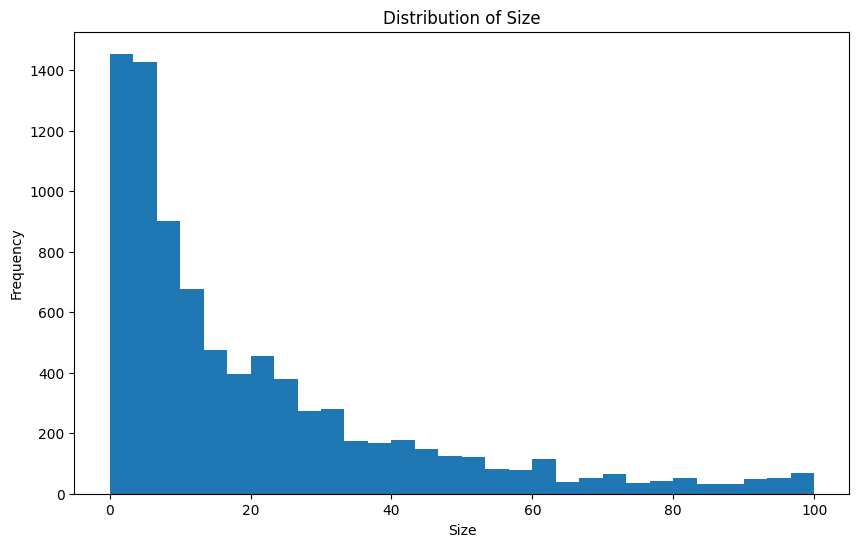

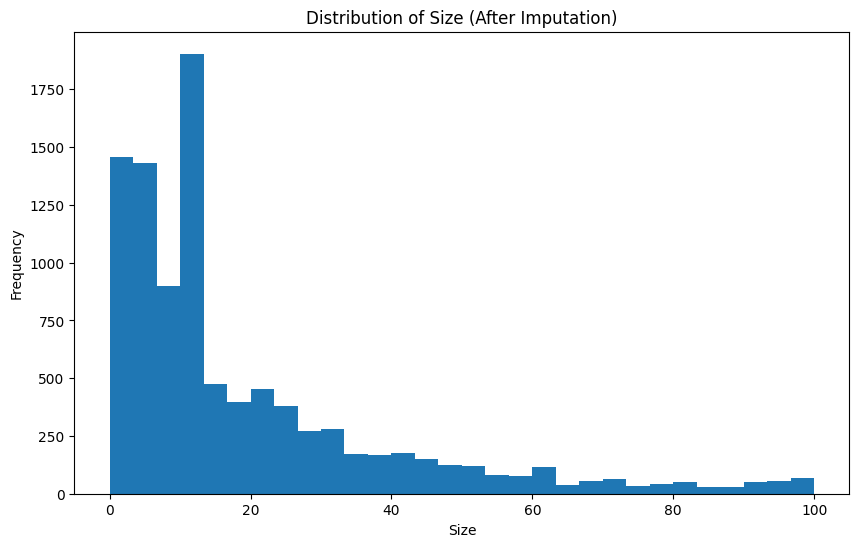

In [342]:
# Write your code here
import matplotlib.pyplot as plt

# Check the distribution of the "Size" variable using matplotlib
plt.figure(figsize=(10, 6))
plt.hist(df['Size'].dropna(), bins=30)
plt.xlabel('Size')
plt.ylabel('Frequency')
plt.title('Distribution of Size')
plt.show()

# Choose the best method to impute the data
# In this example, we will impute with the median value
median_size = df['Size'].median()
df['Size'].fillna(median_size, inplace=True)

# Check the distribution again after imputation
plt.figure(figsize=(10, 6))
plt.hist(df['Size'], bins=30)
plt.xlabel('Size')
plt.ylabel('Frequency')
plt.title('Distribution of Size (After Imputation)')
plt.show()


In [343]:
missing_values = df.isnull().sum()
missing_values

App                  0
Category             0
Rating            1459
Reviews              0
Size                 0
Installs             0
Type                 0
Price                0
Content Rating       0
Genres               0
Last Updated         0
Current Ver          0
Android Ver          0
dtype: int64

### 2.3 Handle the missing data from Rating

- Because it is a rating feature, there are a lot of methods we can do to impute this feature, such as using another data that contains the reviews (every rating for each app) then analyze the sentiment using NLP, or do another methods (you can search for this situation).
- But, now choose the suitable method for imputation that is easy and good.

In [344]:
# Write your code here
# Calculate the mean rating (excluding missing values)
mean_rating = df['Rating'].mean()

# Fill the missing values with the mean rating
df['Rating'].fillna(mean_rating, inplace=True)

missing_values = df.isnull().sum()
missing_values


App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       0
Android Ver       0
dtype: int64

### 2.4 Check the values of both Installs and Price columns

- What did you notice??
- List three notifications for both columns (maybe shared notifications).

In [345]:
# Write your code here
# Check the values of the "Installs" column
print("Installs column values:")
df['Installs'].unique()
df['Installs'].value_counts()





Installs column values:


1,000,000+        1416
100,000+          1112
10,000+           1029
10,000,000+        937
1,000+             886
100+               709
5,000,000+         607
500,000+           504
50,000+            468
5,000+             467
10+                384
500+               328
50+                204
50,000,000+        202
100,000,000+       188
5+                  82
1+                  67
500,000,000+        24
1,000,000,000+      20
0+                  14
0                    1
Name: Installs, dtype: int64

Observations and notifications for the "Installs" column:

1.   The "Installs" column likely represents the number of installations or downloads for each app.
2.   The values in the "Installs" column may have a specific format, such as "1,000,000+" or "100,000+". The plus sign (+) indicates that the value represents an approximate number of installs.

3.  The values in the "Installs" column may have different magnitudes, ranging from thousands to billions, depending on the popularity of the app.






In [346]:
# Check the values of the "Price" column
print("Price column values:")
price_values = df['Price'].unique()
df['Price'].value_counts()

Price column values:


0          8896
$0.99       143
$2.99       124
$1.99        73
$4.99        70
           ... 
$18.99        1
$389.99       1
$19.90        1
$1.75         1
$1.04         1
Name: Price, Length: 92, dtype: int64

Observations and notifications for the "Price" column:

1.   The "Price" column likely represents the price of each app.
2.   The values in the "Price" column may have a specific format, such as "$0.99" or "$4.99". The dollar sign ($) indicates the currency.
3.   The values in the "Price" column may include both whole numbers and decimal values, indicating different price points for the apps.






### 2.5 Check the values for each of the object data type column

- Do not check the Installs and Price columns, we have did this before.
- Make a list that contains the columns that are good to stay as an object.
- Make a list that contains list the columns that are need to convert to categorical.
- Make a list that contains list the columns that are need to convert to Integers.
- Make a list that contains list the columns that are need to convert to Date.

In [347]:
df.dtypes

App                object
Category           object
Rating            float64
Reviews             int64
Size              float64
Installs           object
Type               object
Price              object
Content Rating     object
Genres             object
Last Updated       object
Current Ver        object
Android Ver        object
dtype: object

In [348]:
df[['App','Category','Rating','Reviews','Size','Installs','Type','Price','Content Rating','Genres','Last Updated','Current Ver','Android Ver']].value_counts()

App                                                       Category        Rating    Reviews   Size  Installs      Type  Price  Content Rating  Genres                     Last Updated     Current Ver         Android Ver       
"i DT" Fútbol. Todos Somos Técnicos.                      SPORTS          4.173321  27        3.6   500+          Free  0      Everyone        Sports                     October 7, 2017  0.22                4.1 and up            1
My Talking Tom                                            GAME            4.500000  14891223  12.0  500,000,000+  Free  0      Everyone        Casual                     July 19, 2018    4.8.0.132           4.1 and up            1
My Teacher - Classroom Play                               FAMILY          4.000000  155276    61.0  10,000,000+   Free  0      Everyone        Role Playing;Pretend Play  June 18, 2018    1.1.0               4.1 and up            1
My Telcel                                                 TOOLS           3.10000

In [349]:
objects=['App','Current Ver','Android Ver']
categorical=['Category','Type','Genres']
Integers=['Installs','Price']
Date=['Last Updated']

الصراحه هذا الكود احترت فيه بالطريقه اللي فوق سويته بناء على اللي فهمت واللي تحت بحثت بقوقل وطلع معي هذا ما عرف اذا صح اول لا

In [350]:
# CODE NUMBER TWO
# Exclude "Installs" and "Price" columns
excluded_columns = ["Installs", "Price"]
object_columns = df.select_dtypes(include="object").columns.drop(excluded_columns)

# Check values for each object column
for column in object_columns:
    column_values = df[column].unique()
    print(f"{column} column values:")
    print(column_values)
    print()

# Columns to stay as object
columns_to_stay_object = ["Column1", "Column2", "Column3"]

# Columns to convert to categorical
columns_to_convert_categorical = ["Column4", "Column5", "Column6"]

# Columns to convert to integers
columns_to_convert_integers = ["Column7", "Column8", "Column9"]

# Columns to convert to date
columns_to_convert_date = ["Column10", "Column11", "Column12"]

App column values:
['Photo Editor & Candy Camera & Grid & ScrapBook' 'Coloring book moana'
 'U Launcher Lite – FREE Live Cool Themes, Hide Apps' ...
 'Parkinson Exercices FR' 'The SCP Foundation DB fr nn5n'
 'iHoroscope - 2018 Daily Horoscope & Astrology']

Category column values:
['ART_AND_DESIGN' 'AUTO_AND_VEHICLES' 'BEAUTY' 'BOOKS_AND_REFERENCE'
 'BUSINESS' 'COMICS' 'COMMUNICATION' 'DATING' 'EDUCATION' 'ENTERTAINMENT'
 'EVENTS' 'FINANCE' 'FOOD_AND_DRINK' 'HEALTH_AND_FITNESS' 'HOUSE_AND_HOME'
 'LIBRARIES_AND_DEMO' 'LIFESTYLE' 'GAME' 'FAMILY' 'MEDICAL' 'SOCIAL'
 'SHOPPING' 'PHOTOGRAPHY' 'SPORTS' 'TRAVEL_AND_LOCAL' 'TOOLS'
 'PERSONALIZATION' 'PRODUCTIVITY' 'PARENTING' 'WEATHER' 'VIDEO_PLAYERS'
 'NEWS_AND_MAGAZINES' 'MAPS_AND_NAVIGATION']

Type column values:
['Free' 'Paid']

Content Rating column values:
['Everyone' 'Teen' 'Everyone 10+' 'Mature 17+' 'Adults only 18+' 'Unrated']

Genres column values:
['Art & Design' 'Art & Design;Pretend Play' 'Art & Design;Creativity'
 'Art & Design;

### 2.6 Clean the Installs and Price columns

- Remove unwanted characters.

In [351]:
# Write your code here
# Clean the "Installs" column
df['Installs'] = df['Installs'].str.replace('[+,]', '', regex=True).astype(int)



In [352]:
df['Installs'].value_counts()

1000000       1416
100000        1112
10000         1029
10000000       937
1000           886
100            709
5000000        607
500000         504
50000          468
5000           467
10             384
500            328
50             204
50000000       202
100000000      188
5               82
1               67
500000000       24
1000000000      20
0               15
Name: Installs, dtype: int64

In [354]:
# Write your code here
# Clean the "Price" column
df['Price'] = df['Price'].str.replace('[$,]', '', regex=True).astype(float)

In [355]:
df['Price'].value_counts()

0.00      8896
0.99       143
2.99       124
1.99        73
4.99        70
          ... 
18.99        1
389.99       1
19.90        1
1.75         1
1.04         1
Name: Price, Length: 92, dtype: int64

### 2.7 Convert the data type of each object data type columns

- That is including Installs and Price columns.
- Build a function that receives 3 parameters
    1. List of columns you want to convert.
    2. Dataset which in our case the android apps.
    3. Data type that you want to convert to.
- In the function, loop through each column from the list.
- Use df[col].astype(data_type) function to convert the columns.
- Note : The list of date columns need not included in this step.

In [356]:
 # Write your code here
 def convert_col_data_type(lst_of_cols, df, data_type):
    for col in lst_of_cols:
        df[col] = df[col].astype(data_type)
        print(f"Converted {col} column to {data_type} data type.")
    print("Conversion completed.")

In [357]:
columns_to_convert = ["Installs", "Price"]
convert_col_data_type(columns_to_convert, df, float)

Converted Installs column to <class 'float'> data type.
Converted Price column to <class 'float'> data type.
Conversion completed.


In [358]:
df.head()


,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19.0,10000.0,Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,500000.0,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7,5000000.0,Free,0.0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25.0,50000000.0,Free,0.0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8,100000.0,Free,0.0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


### 2.8 Convert the list of date columns into a suitable format.

- Use pd.to_datetime(df[col]) function.

In [359]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9649 entries, 0 to 9658
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             9649 non-null   object 
 1   Category        9649 non-null   object 
 2   Rating          9649 non-null   float64
 3   Reviews         9649 non-null   int64  
 4   Size            9649 non-null   float64
 5   Installs        9649 non-null   float64
 6   Type            9649 non-null   object 
 7   Price           9649 non-null   float64
 8   Content Rating  9649 non-null   object 
 9   Genres          9649 non-null   object 
 10  Last Updated    9649 non-null   object 
 11  Current Ver     9649 non-null   object 
 12  Android Ver     9649 non-null   object 
dtypes: float64(4), int64(1), object(8)
memory usage: 1.0+ MB


# 3 Data Visualization

### 3.1 Plot the distribution for each categories using Bar Chart.

- The figure size is 16 by 8.
- Set the title, x label, and y label.
- Make sure that the names of the categories not overlapped (use xtricks method with some rotation value).

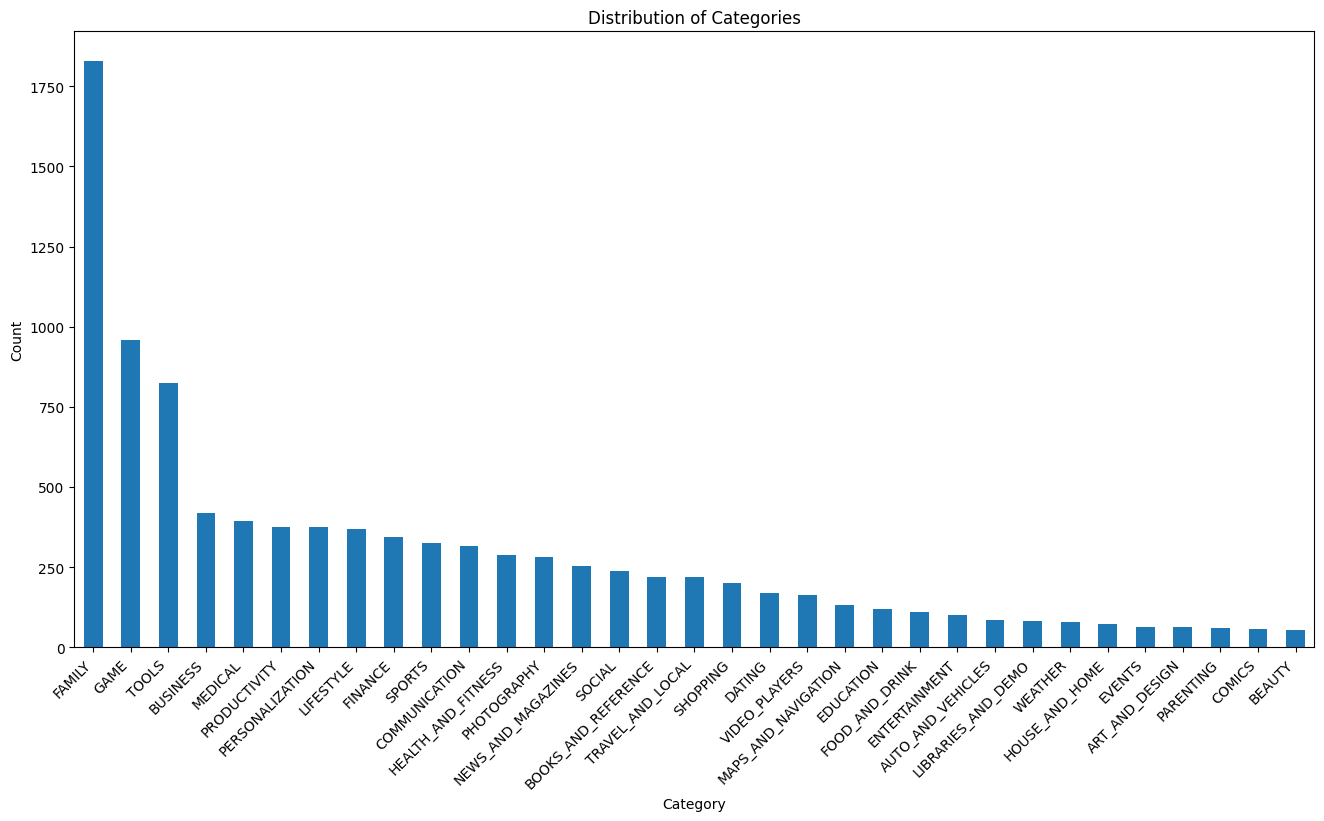

In [360]:
# Write your code here


# Set the figure size
plt.figure(figsize=(16, 8))

# Plot the bar chart
df['Category'].value_counts().plot(kind='bar')

# Set the title, x label, and y label
plt.title('Distribution of Categories')
plt.xlabel('Category')
plt.ylabel('Count')

# Adjust the x-axis labels to avoid overlap
plt.xticks(rotation=45, ha='right')

# Display the plot
plt.show()

### 3.2 What are the categories has the heighest share of active apps?

- Use Bar Chart.
- Visualize the best 5 categories.

In [361]:

# Calculate the number of categories in the dataset
num_categories = len(df['Category'].unique())
print('Number of categories =', num_categories)

Number of categories = 33


In [362]:
def get_top_categories(df, column, n):
    # Count the occurrences of each category
    category_counts = df[column].value_counts()

    # Get the top n categories with the highest counts
    top_categories = category_counts.head(n)

    # Return the top categories
    return top_categories


top_categories = get_top_categories(df, 'Category', 5)

print(top_categories)

FAMILY      1829
GAME         959
TOOLS        825
BUSINESS     420
MEDICAL      395
Name: Category, dtype: int64


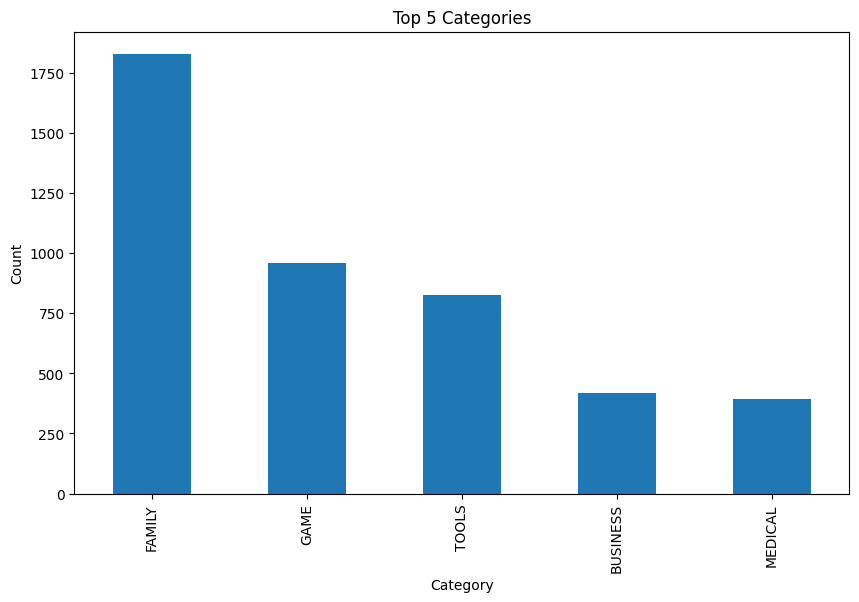

In [363]:

def plot_top_categories(df, column, n):
    # Count the occurrences of each category
    category_counts = df[column].value_counts()

    # Get the top n categories with the highest counts
    top_categories = category_counts.head(n)

    # Create a bar plot
    plt.figure(figsize=(10, 6))
    top_categories.plot(kind='bar')
    plt.xlabel('Category')
    plt.ylabel('Count')
    plt.title(f'Top {n} Categories')
    plt.show()


plot_top_categories(df, 'Category', 5)

### 3.3 What are the categories has the lowest share of active apps?

- Use Bar Chart.
- Visualize the lowest 5 apps.

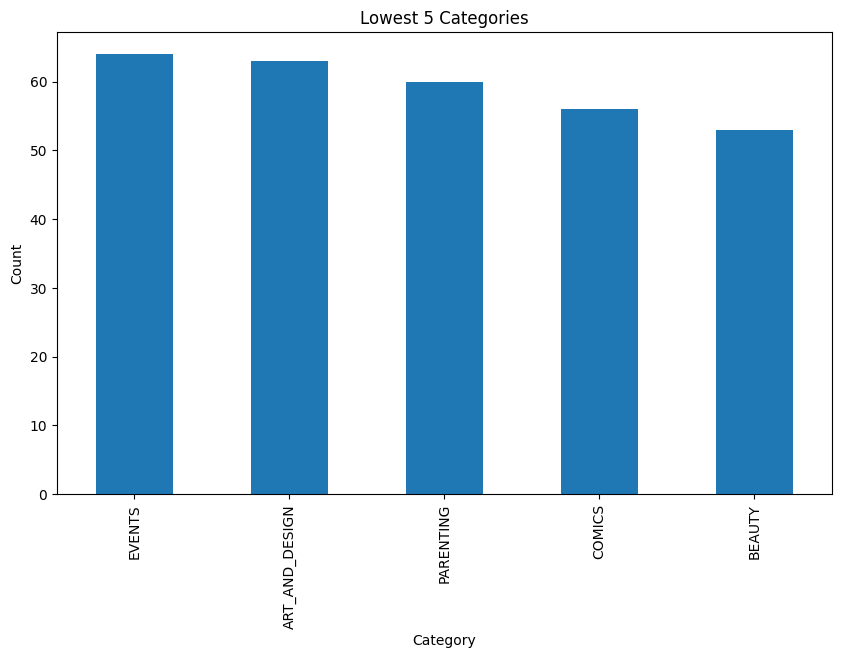

In [364]:
# Write your code here


def plot_lowest_categories(df, column, n):
    # Count the occurrences of each category
    category_counts = df[column].value_counts()

    # Get the lowest n categories with the lowest counts
    lowest_categories = category_counts.tail(n)

    # Create a bar plot
    plt.figure(figsize=(10, 6))
    lowest_categories.plot(kind='bar')
    plt.xlabel('Category')
    plt.ylabel('Count')
    plt.title(f'Lowest {n} Categories')
    plt.show()

plot_lowest_categories(df, 'Category', 5)

### 3.4 How does the app average rating vary across different categories?

- The figure size is 12 by 12.
- Use Horizontal Bar Chart.
- Set the title, x label, and y label.

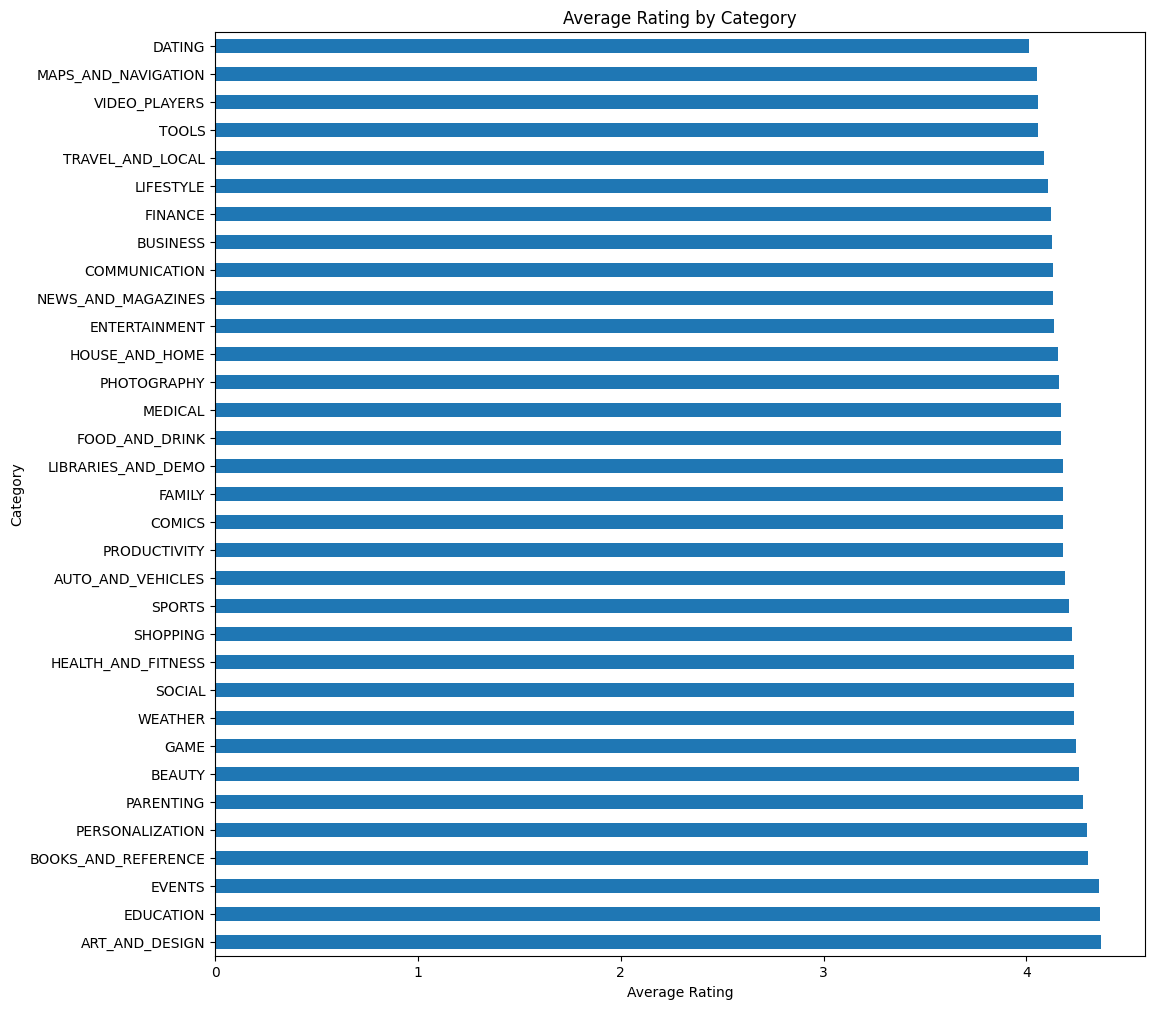

In [365]:

def plot_average_rating_by_category(df, category_column, rating_column):
    # Calculate the average rating for each category
    average_ratings = df.groupby(category_column)[rating_column].mean().sort_values(ascending=False)

    # Create a horizontal bar chart
    plt.figure(figsize=(12, 12))
    average_ratings.plot(kind='barh')
    plt.title('Average Rating by Category')
    plt.xlabel('Average Rating')
    plt.ylabel('Category')
    plt.show()

plot_average_rating_by_category(df, 'Category', 'Rating')

### 3.5 Plot the Average app size for each content rating distribution

- You need to use group by.
- Use Bar Plot.
- Set the width as 0.35.
- Label = 'Average size".
- Show the legend.
- Set the title, x label, and y label.

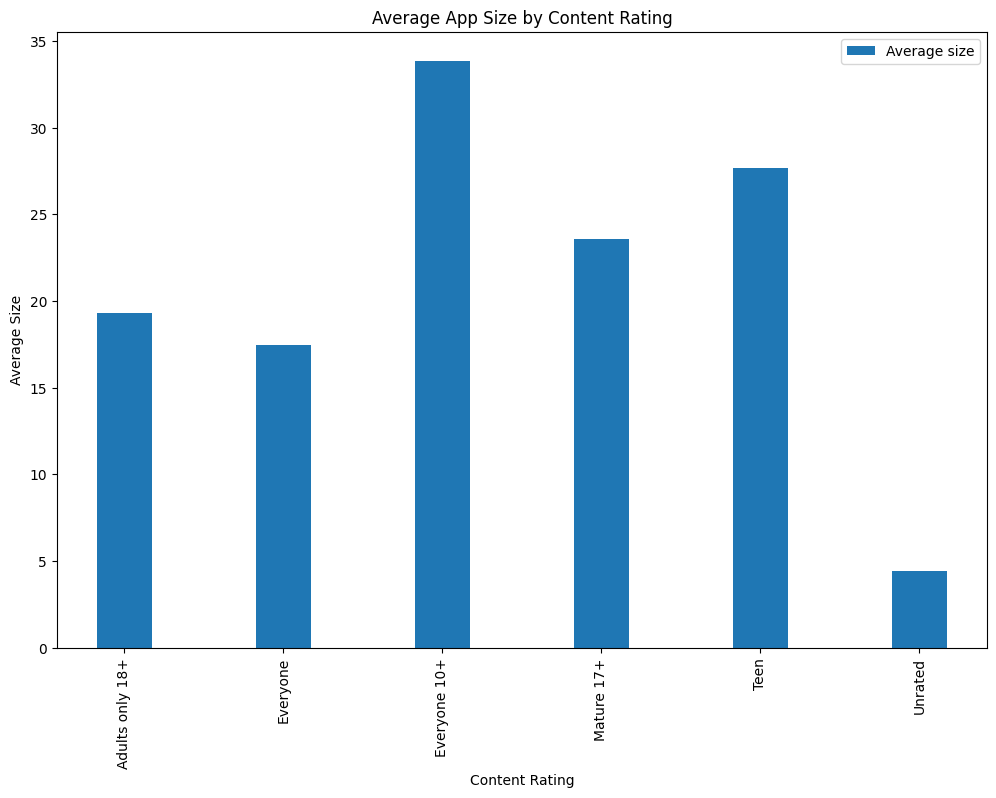

In [366]:
# Write your code here

def plot_average_app_size_by_rating(df, rating_column, size_column):
    # Calculate the average app size for each content rating
    average_sizes = df.groupby(rating_column)[size_column].mean()

    # Create a bar plot
    plt.figure(figsize=(12, 8))
    average_sizes.plot(kind='bar', width=0.35)
    plt.xlabel('Content Rating')
    plt.ylabel('Average Size')
    plt.title('Average App Size by Content Rating')
    plt.legend(['Average size'])
    plt.show()

plot_average_app_size_by_rating(df, 'Content Rating', 'Size')

### 3.6 Common content ratings for different categories using a stacked bar chart.

<Figure size 1200x800 with 0 Axes>

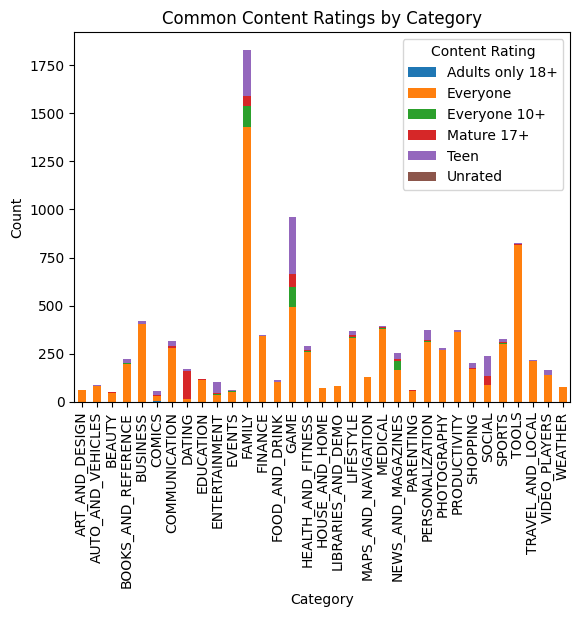

In [367]:
# Write your code here

def plot_common_ratings_by_category(data, category_column, rating_column):
    # Create a pivot table to count the occurrences of each content rating for each category
    ratings_by_category = pd.pivot_table(data, index=category_column, columns=rating_column, aggfunc='size', fill_value=0)

    # Create a stacked bar chart
    plt.figure(figsize=(12, 8))
    ratings_by_category.plot(kind='bar', stacked=True)
    plt.xlabel('Category')
    plt.ylabel('Count')
    plt.title('Common Content Ratings by Category')
    plt.legend(title='Content Rating')
    plt.show()

plot_common_ratings_by_category(df, 'Category', 'Content Rating')

### 3.7 Use area plot to show the change in total reviews over the years.

- Extract the year from your date column as new column "Year".
- Use group by function.
- The figure size is 10 by 6.
- The color of the plot is "skyblue".
- The alpha is 0.4.
- Set the title, x label, and y label.

In [368]:
print(df.columns)

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver'],
      dtype='object')


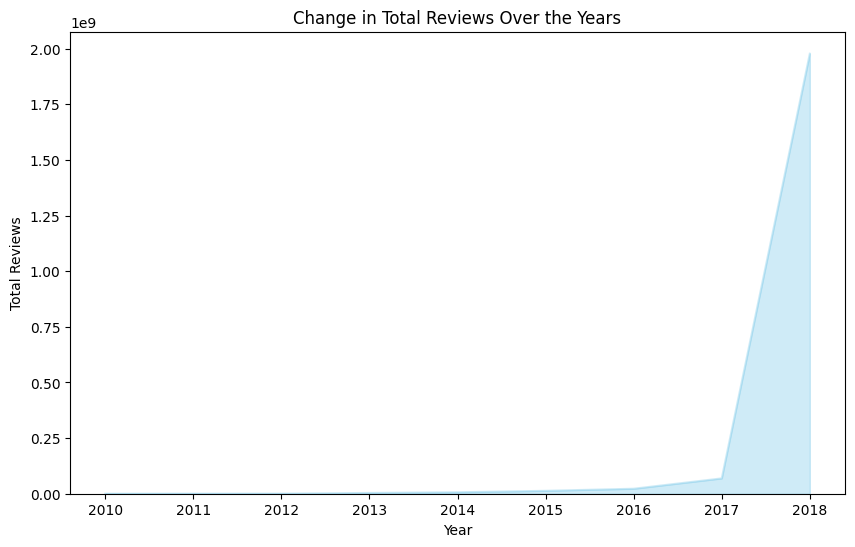

In [369]:
# Write your code here

def plot_total_reviews_over_years(data, date_column, review_column):
    # Extract the year from the date column and create a new 'Year' column
    data['Year'] = pd.to_datetime(data[date_column]).dt.year

    # Group by year and calculate the total reviews
    total_reviews_by_year = data.groupby('Year')[review_column].sum()

    # Create an area plot
    plt.figure(figsize=(10, 6))
    total_reviews_by_year.plot(kind='area', color='skyblue', alpha=0.4)
    plt.title('Change in Total Reviews Over the Years')
    plt.xlabel('Year')
    plt.ylabel('Total Reviews')
    plt.show()


plot_total_reviews_over_years(df, 'Last Updated', 'Reviews')


In [370]:
# Output :-

### 3.8 Use line plot to show the total Installs over the years.

- Use the same extracted year column.
- Use group by function.
- The figure size is 10 by 6.
- The color of the plot is "skyblue".
- The marker is 'o'.
- Set the title, x label, and y label.

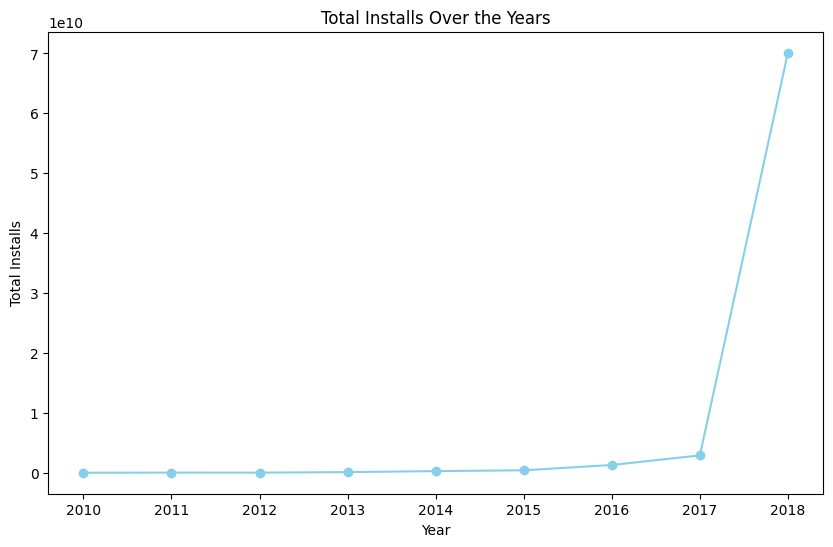

In [371]:
# Write your code here


def plot_total_installs_over_years(data, year_column, installs_column):
    # Group by year and calculate the total installs
    total_installs_by_year = data.groupby(year_column)[installs_column].sum()

    # Create a line plot
    plt.figure(figsize=(10, 6))
    total_installs_by_year.plot(kind='line', color='skyblue', marker='o')
    plt.title('Total Installs Over the Years')
    plt.xlabel('Year')
    plt.ylabel('Total Installs')
    plt.show()


plot_total_installs_over_years(df, 'Year', 'Installs')

### 3.9 Make a subplot with four histograms

- Two rows and two columns.
- The first hist : Distribution of app sizes.
- The second hist : App rating distribution.
- The third hist : Distribution of app installs.
- The fourth hist : Distribution of app prices.
- Use 30 bins and different colors.

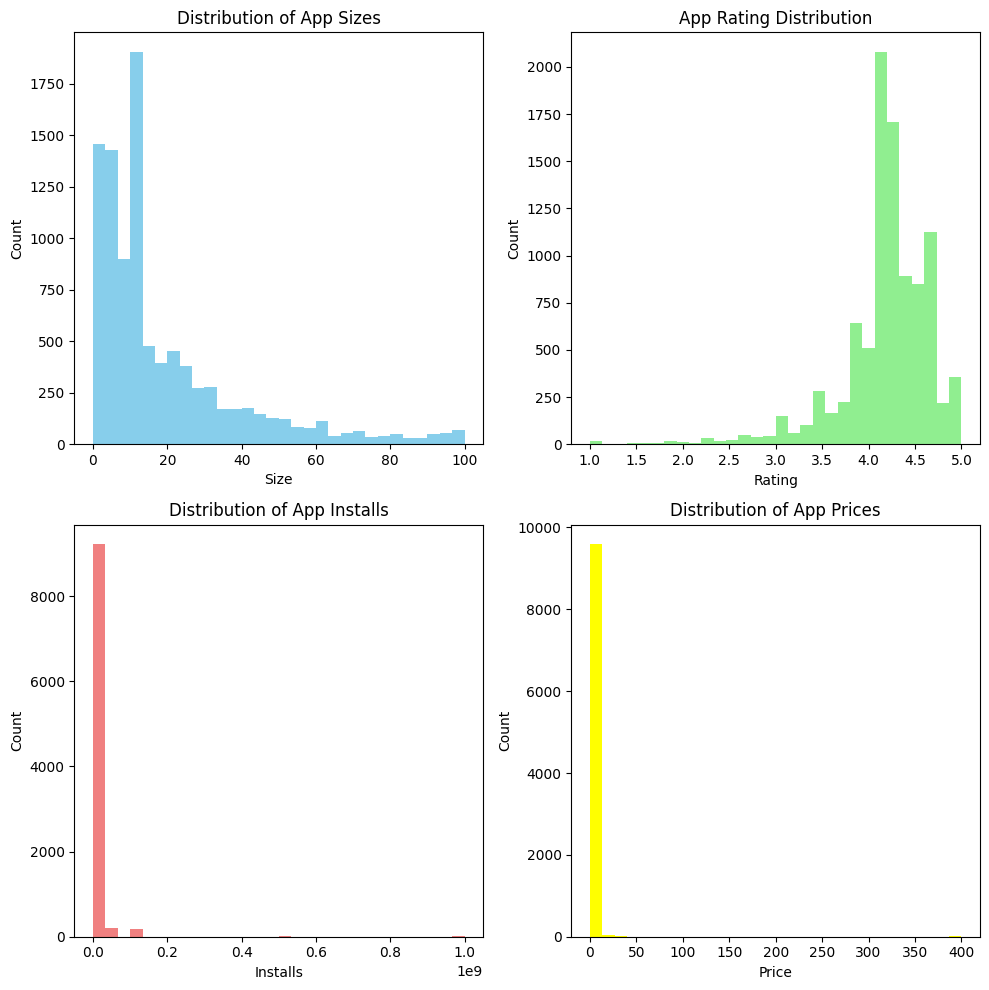

In [372]:
# Write your code here

# Create a figure and a 2x2 grid of subplots
fig, axs = plt.subplots(2, 2, figsize=(10, 10))

# Histogram 1: App Sizes
axs[0, 0].hist(df['Size'], bins=30, color='skyblue')
axs[0, 0].set_title('Distribution of App Sizes')
axs[0, 0].set_xlabel('Size')
axs[0, 0].set_ylabel('Count')

# Histogram 2: App Ratings
axs[0, 1].hist(df['Rating'], bins=30, color='lightgreen')
axs[0, 1].set_title('App Rating Distribution')
axs[0, 1].set_xlabel('Rating')
axs[0, 1].set_ylabel('Count')

# Histogram 3: App Installs
axs[1, 0].hist(df['Installs'], bins=30, color='lightcoral')
axs[1, 0].set_title('Distribution of App Installs')
axs[1, 0].set_xlabel('Installs')
axs[1, 0].set_ylabel('Count')

# Histogram 4: App Prices
axs[1, 1].hist(df['Price'], bins=30, color='yellow')
axs[1, 1].set_title('Distribution of App Prices')
axs[1, 1].set_xlabel('Price')
axs[1, 1].set_ylabel('Count')

# Adjust spacing between subplots
plt.tight_layout()

# Display the plot
plt.show()

### 3.10 Create a pie chart to visualize the categories.

- Take the top 10 apps.
- autopct parameter is '%1.1f%%'.

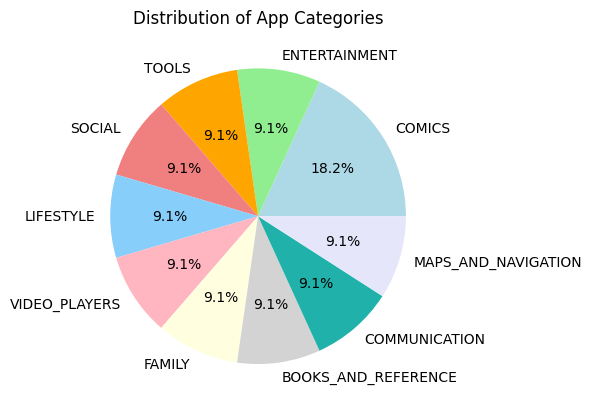

In [373]:
top_10_apps = df.sort_values('App', ascending=False).head(11)

category_counts = top_10_apps['Category'].value_counts()
colors = ['lightblue', 'lightgreen', 'orange', 'lightcoral', 'lightskyblue', 'lightpink', 'lightyellow', 'lightgray', 'lightseagreen', 'lavender']
plt.pie(category_counts, labels=category_counts.index, autopct='%1.1f%%' ,colors=colors)
plt.title('Distribution of App Categories')



plt.show()

### 3.11 Pie chart of the distribution of content ratings.

- Do not take into account the Unrated value.
- So, the number of values are 5 (Everyone, Teen, Mature 17+, Everyone 10+, Adults only 18+).
- The figure size is 8 by 8.
- Enable the shadow parameter.
- Same as the pie chart before.
- The explode parameter is = [0.25, 0.15, 0, 0, 0].

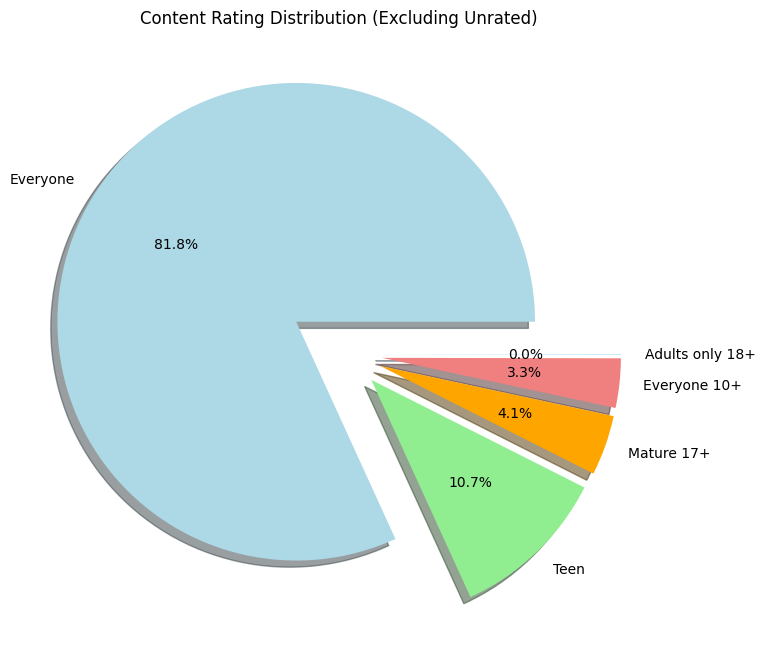

In [374]:
# Exclude the "Unrated" category
df_filtered = df[df['Content Rating'] != 'Unrated']

# Count the number of apps in each category
category_counts = df_filtered['Content Rating'].value_counts()

# Create the explode list
explode = [0.25] + [0.15] * (len(category_counts) - 1)

# Create the pie chart
plt.figure(figsize=(8, 8))
labels = category_counts.index
colors = ['lightblue', 'lightgreen', 'orange', 'lightcoral', 'lightskyblue']
plt.pie(category_counts, labels=labels, explode=explode, autopct='%1.1f%%', shadow=True, colors=colors)
plt.title('Content Rating Distribution (Excluding Unrated)')
plt.axis('equal')

# Display the chart
plt.show()

### 3.12 Create two Box plots in the same figure for Type column

- Based on the number of installs.
- The figure size is 10 by 6.
- Log the y axis by using plt.yscale() method.

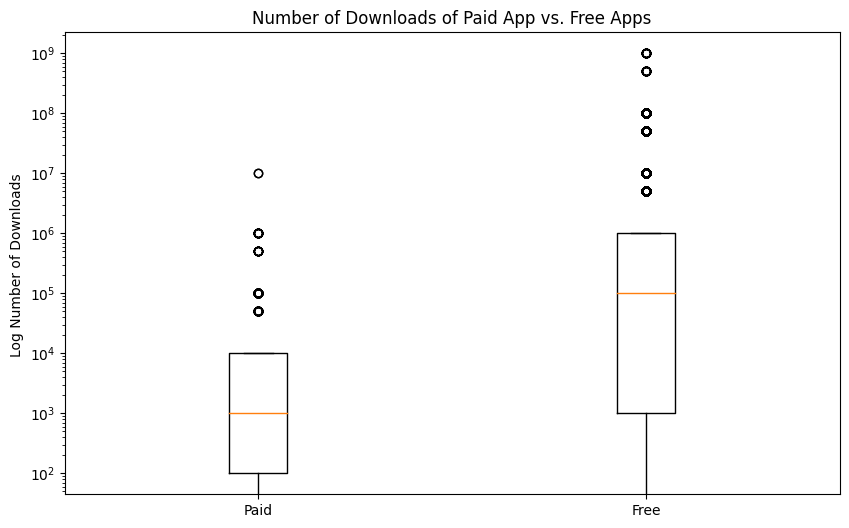

In [375]:

type_1_data = df[df['Type'] == 'Paid']['Installs']
type_2_data = df[df['Type'] == 'Free']['Installs']

# Create a figure with a size of 10 by 6
plt.figure(figsize=(10, 6))

# Create the box plots
plt.boxplot([type_1_data, type_2_data], labels=['Paid', 'Free'])

# Log the y-axis
plt.yscale('log')

# Set the y-axis label
plt.ylabel('Log Number of Downloads ')

# Set the title
plt.title('Number of Downloads of Paid App vs. Free Apps')

# Display the chart
plt.show()